# RANDOM FOREST REGRESSOR

IMPORTING LIBRARIES

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math

LOADING DATA 

In [4]:
dataset=pd.read_csv('/content/drive/My Drive/data/Position_Salaries.csv')
dataset.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

EXTRACTING COLUMNS AND CONVERTING THEM INTO NUMPY ARRAY

In [6]:
x=dataset['Level'].values
y=dataset['Salary'].values

x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)


SPLITTING DATA INTO TRAIN AND TEST

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

SCALING DATA (FEATURE SCALING)

In [9]:
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
y_train=sc_y.fit_transform(y_train)

TRAINING THE MODEL

In [10]:
modelRF=RandomForestRegressor(random_state=0)
modelRF.fit(x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

FINDING LENGTH OF ESTIMATOR FOR LOOPING

In [14]:
len(modelRF.estimators_)

100

VISUALIZING RANDOM FOREST

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


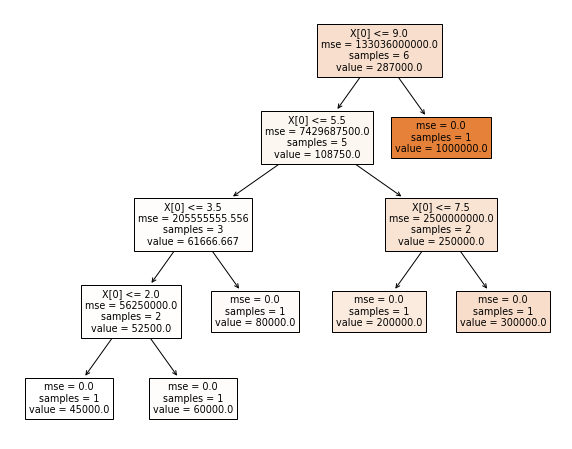

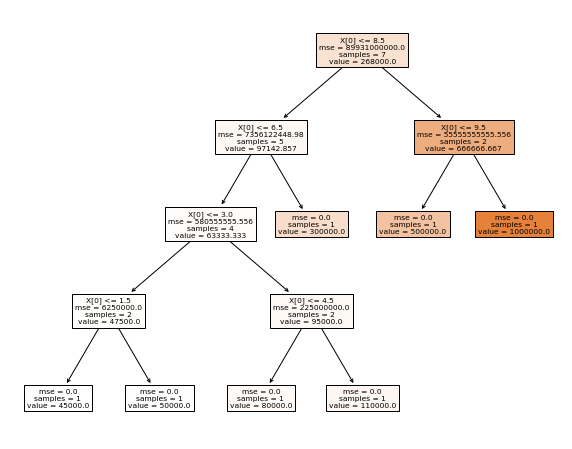

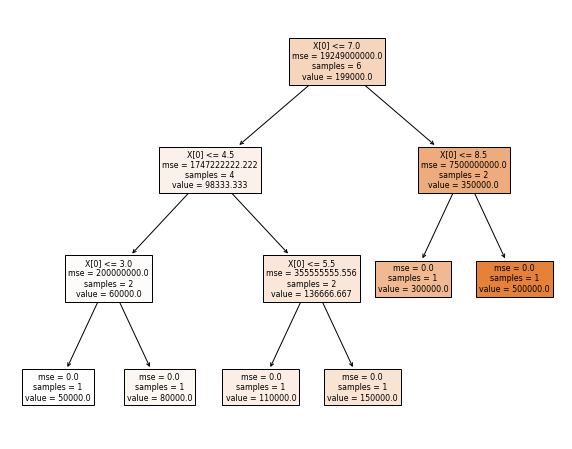

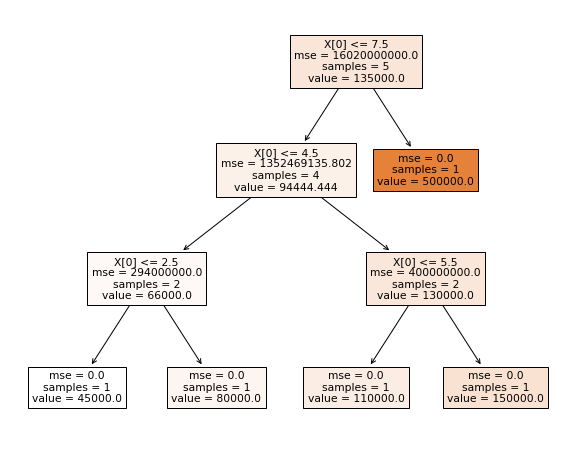

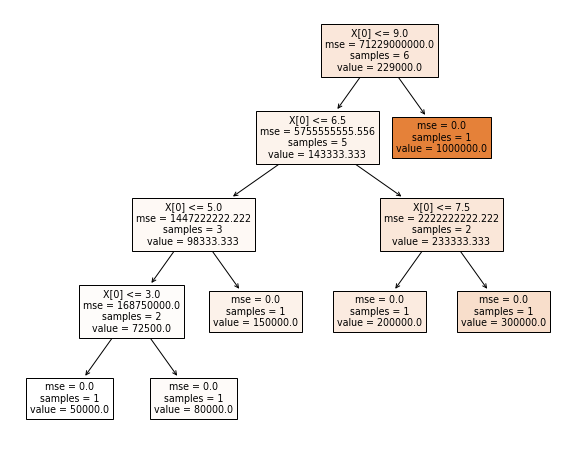

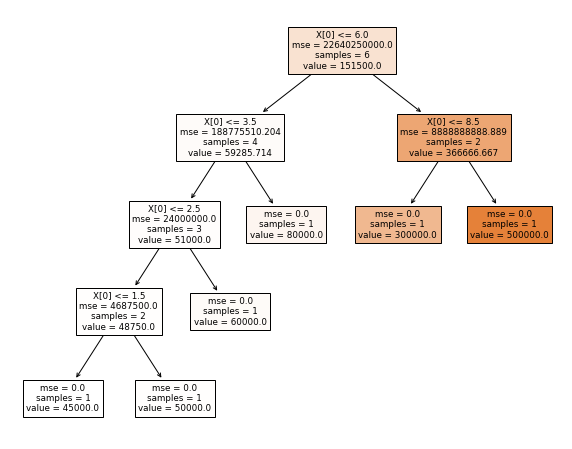

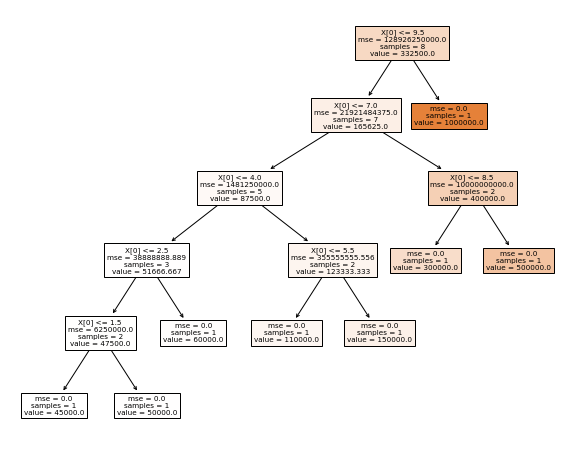

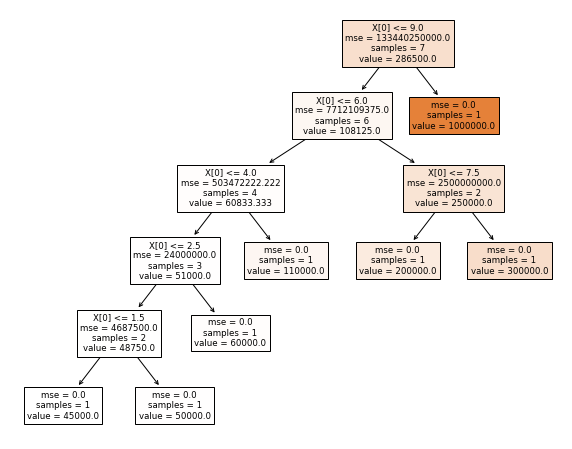

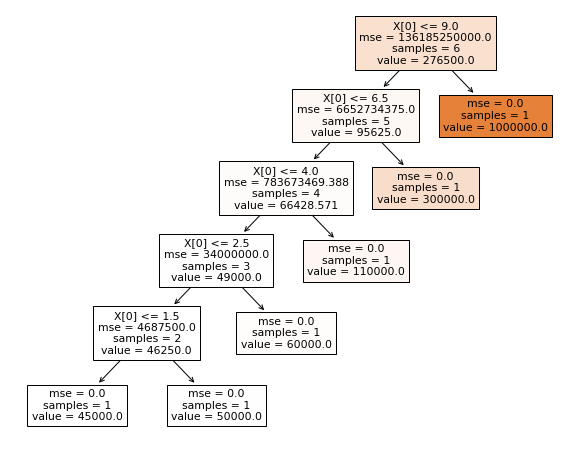

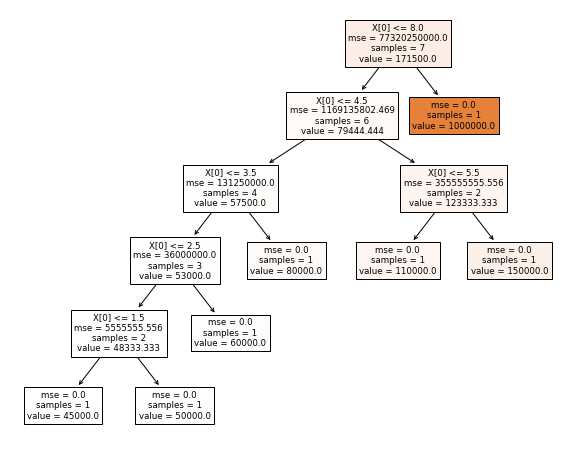

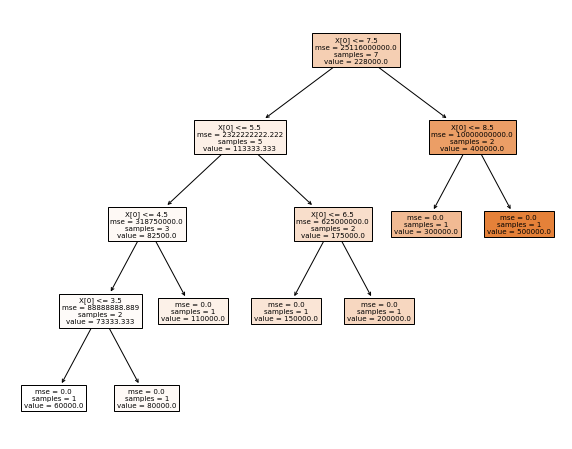

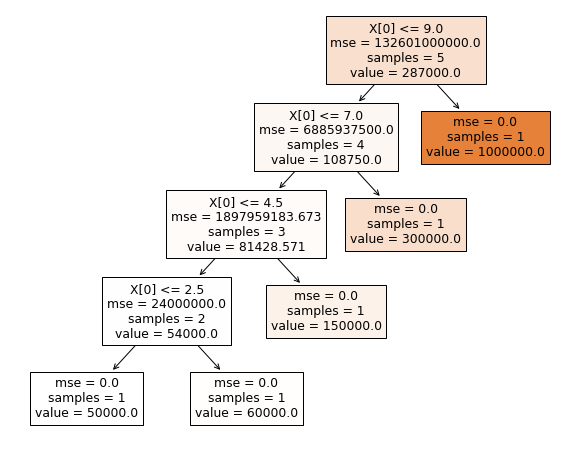

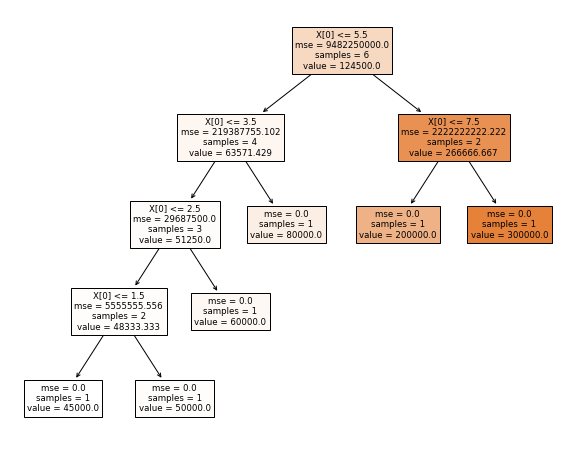

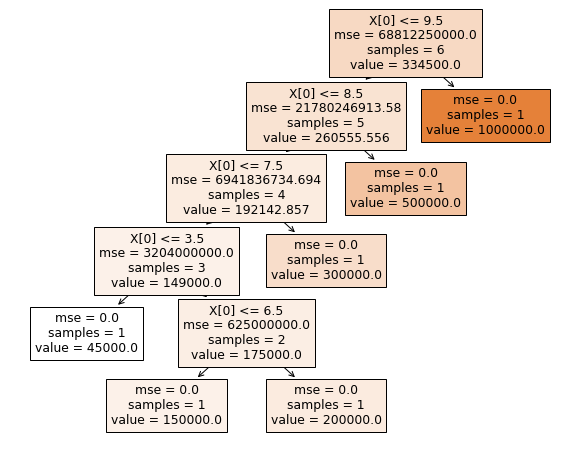

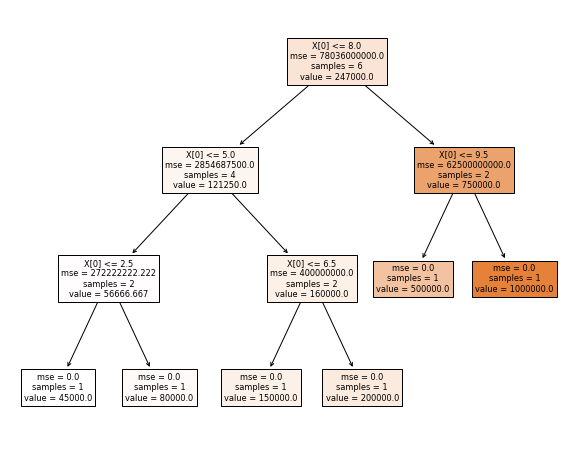

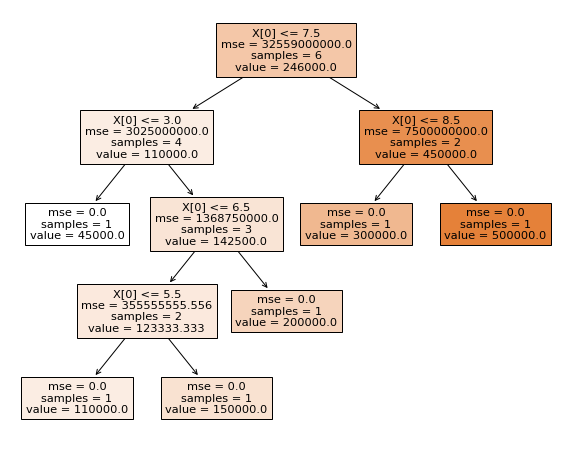

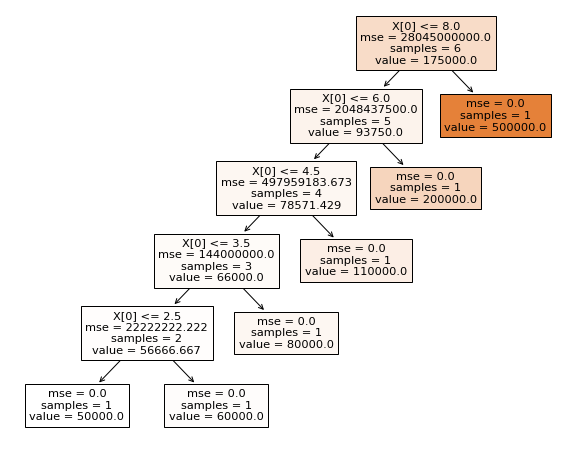

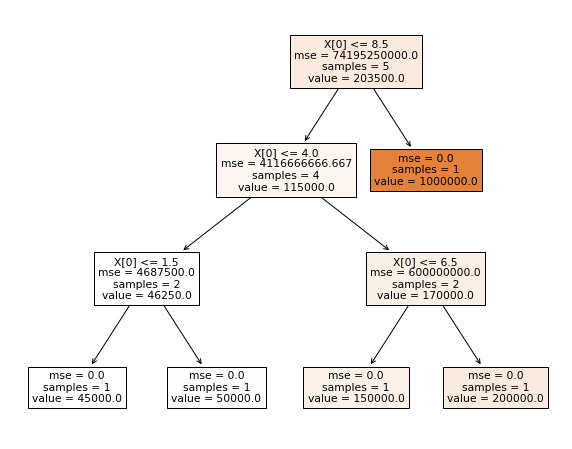

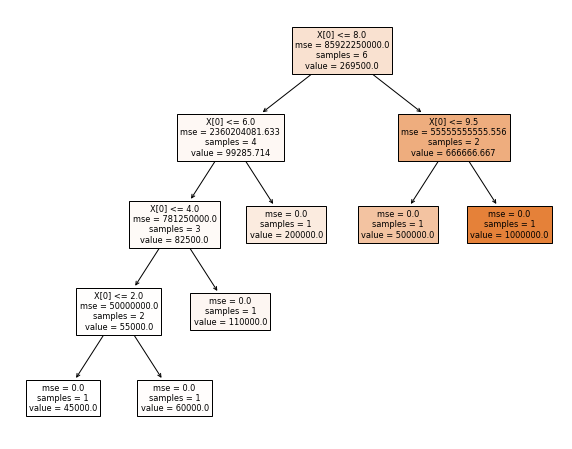

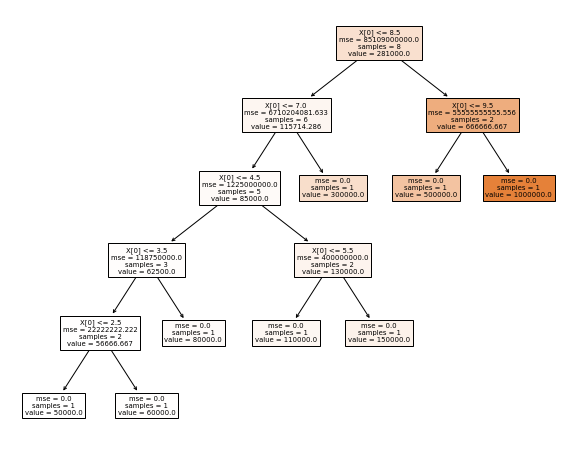

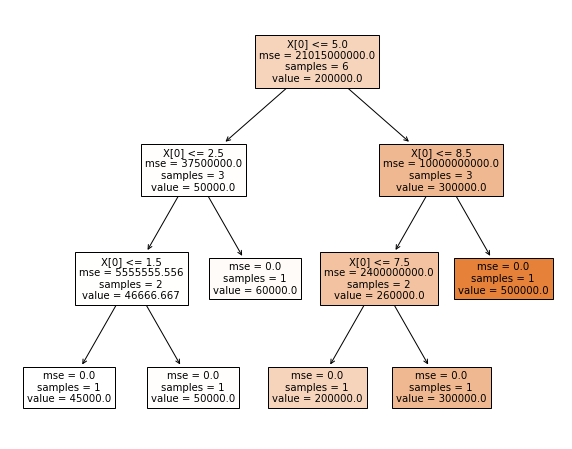

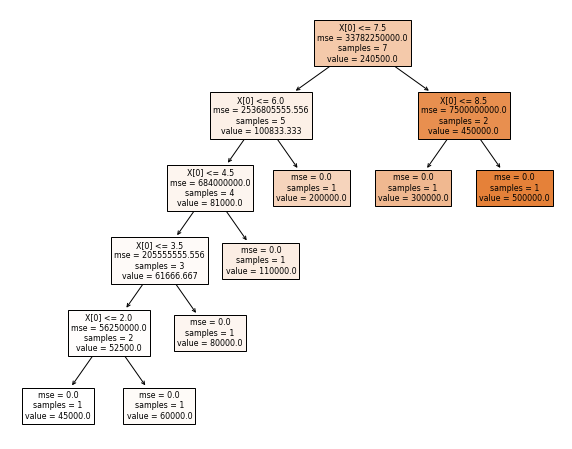

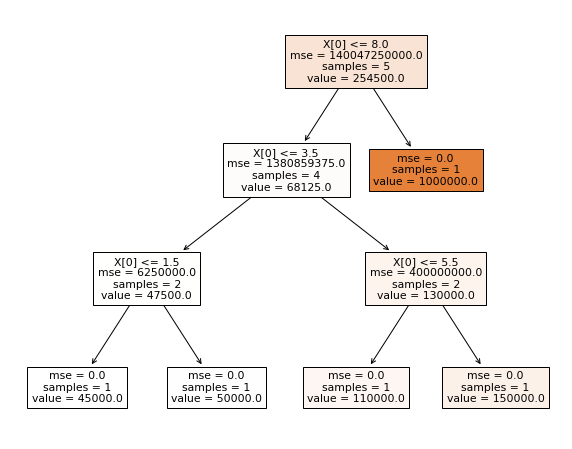

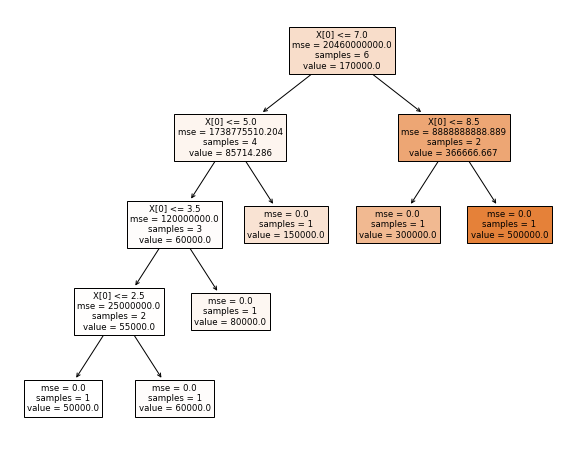

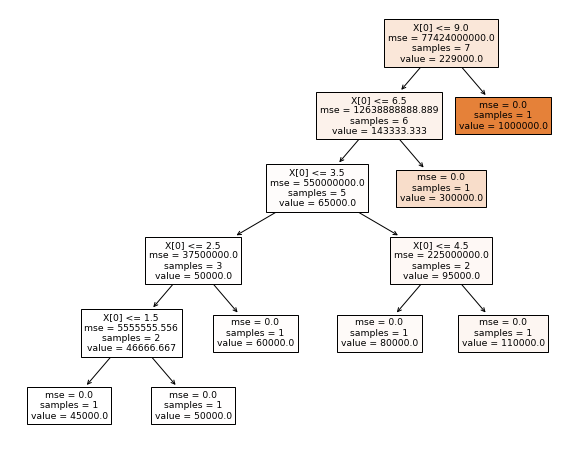

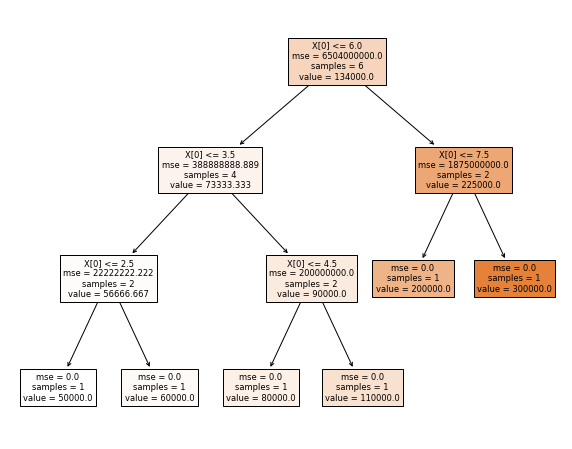

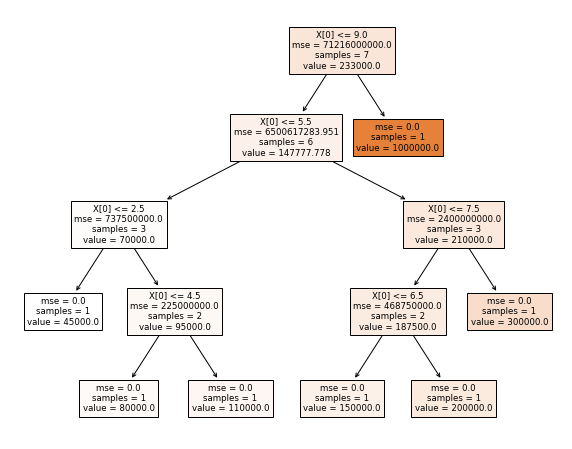

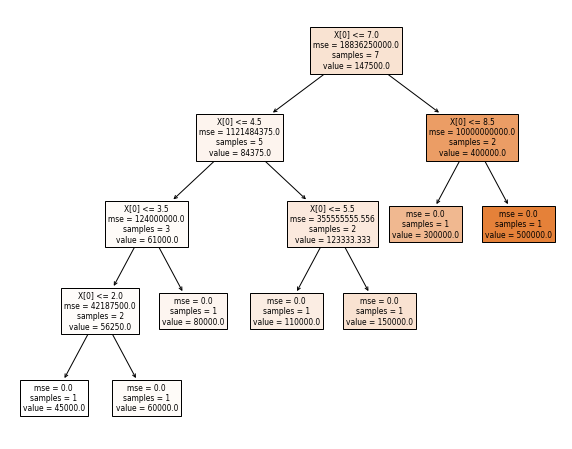

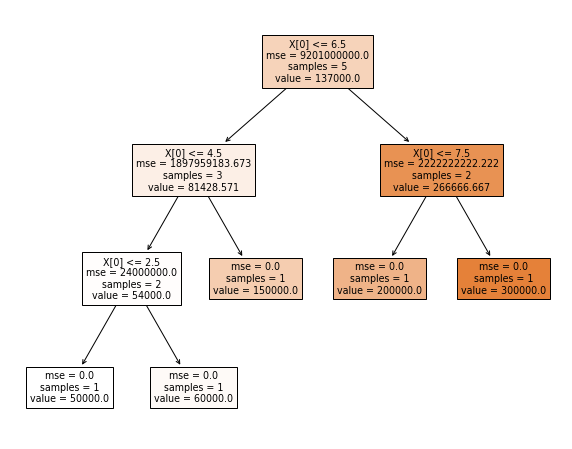

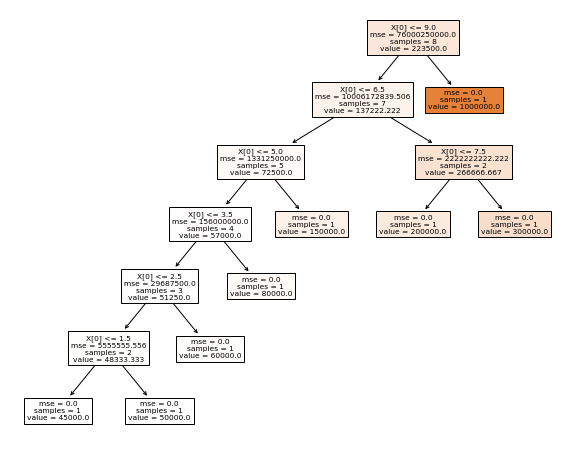

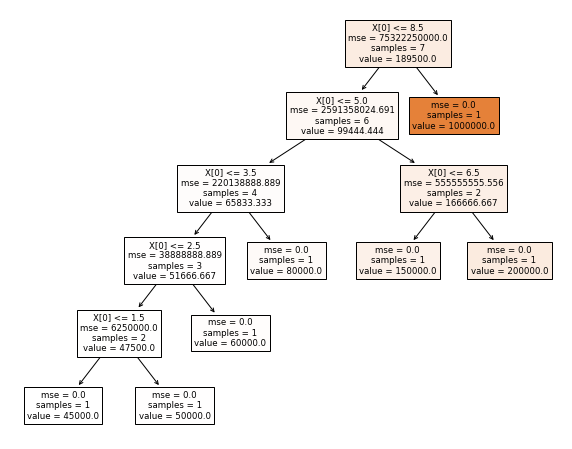

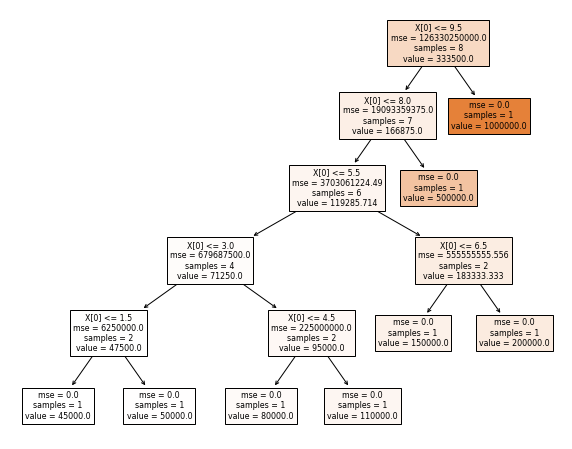

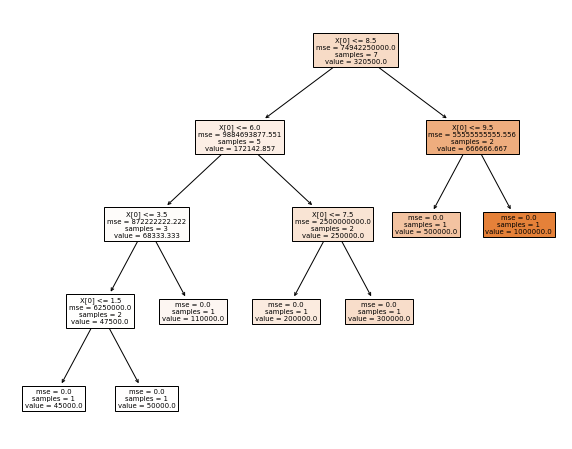

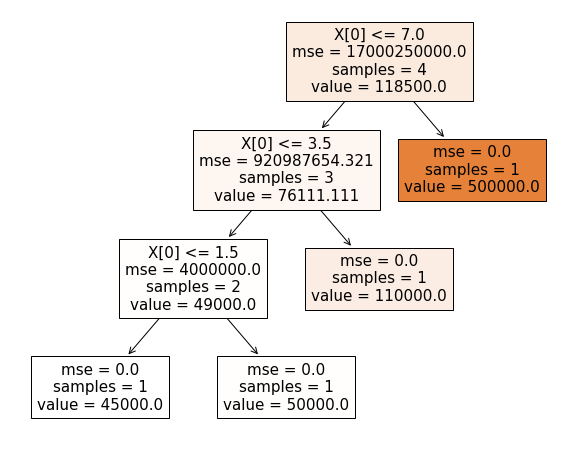

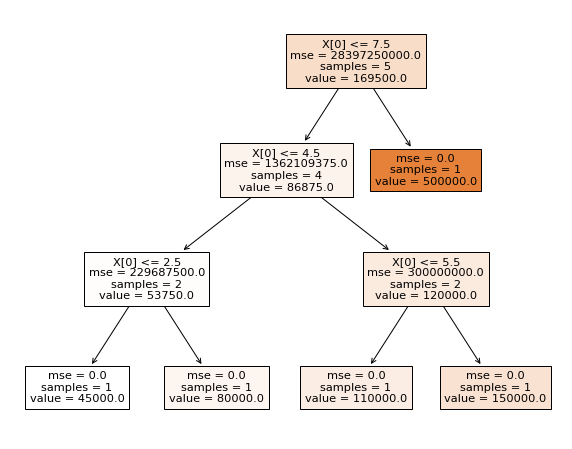

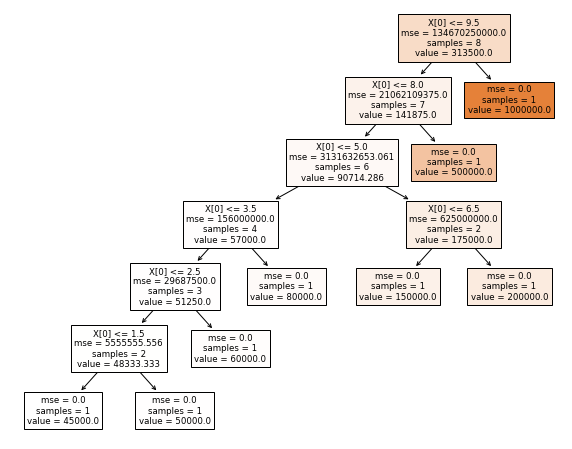

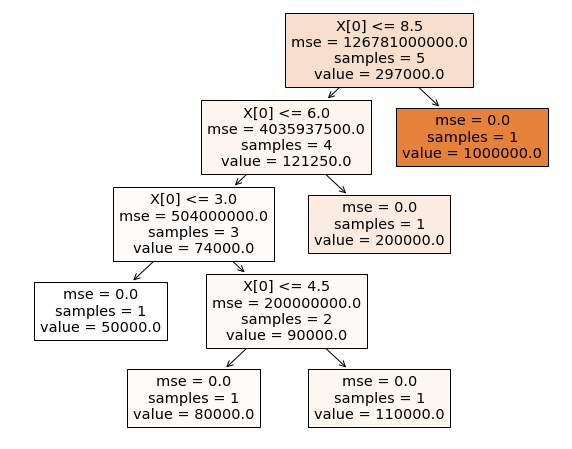

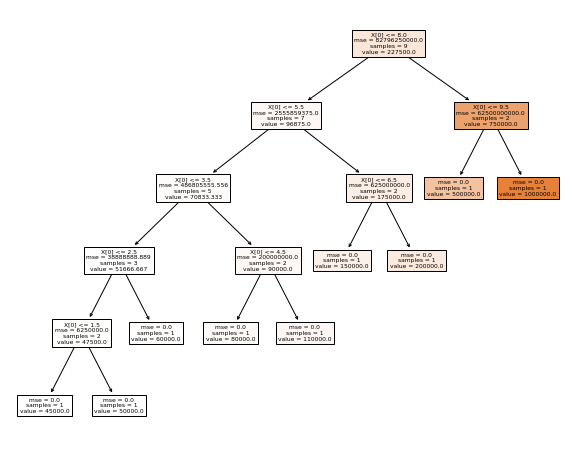

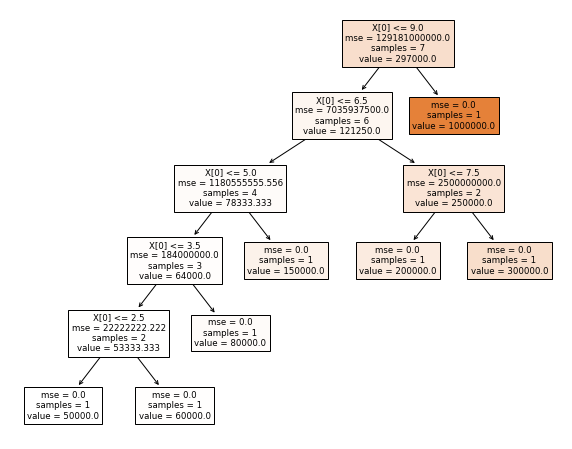

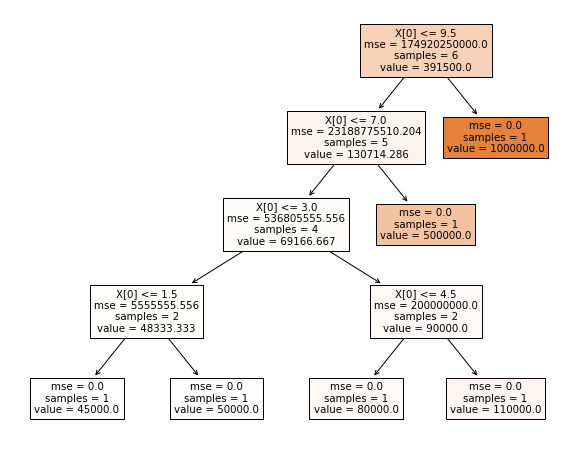

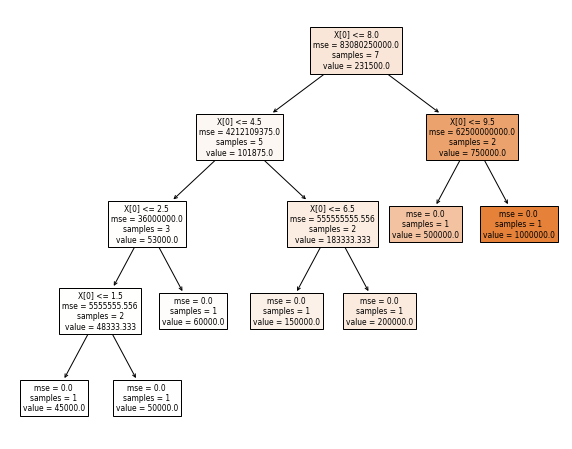

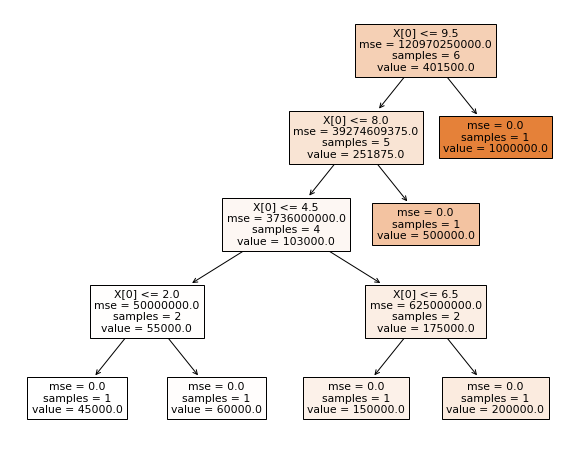

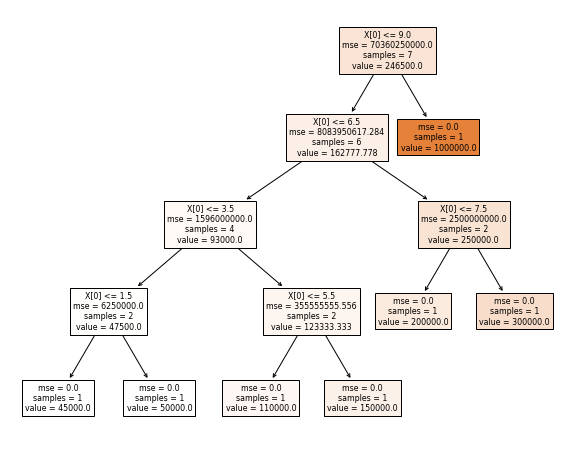

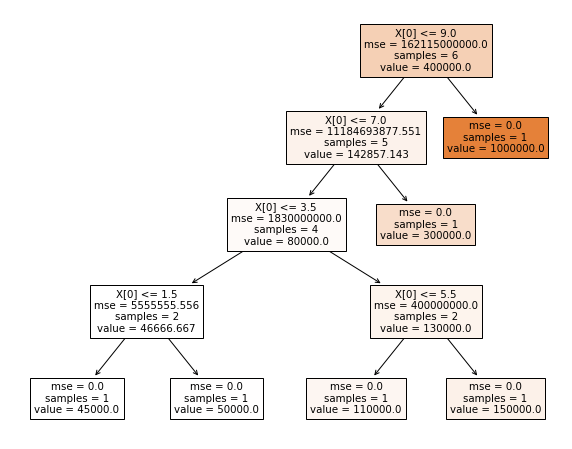

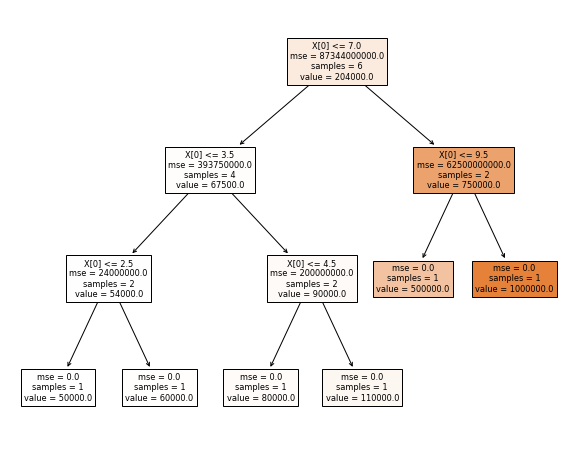

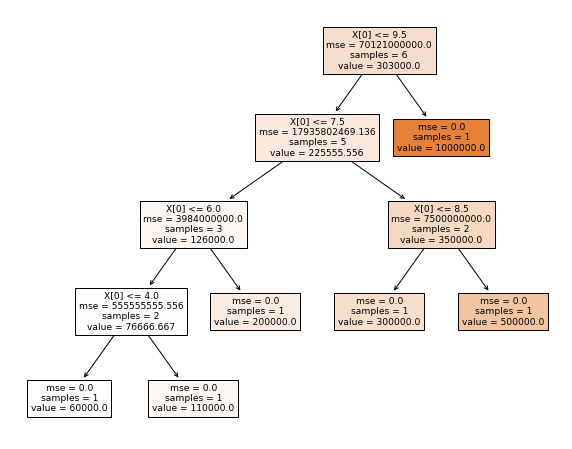

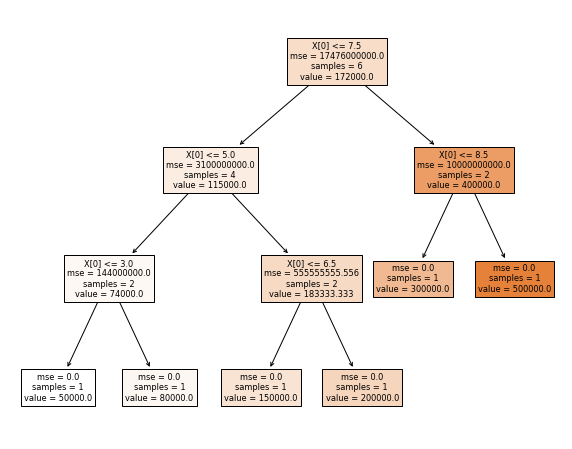

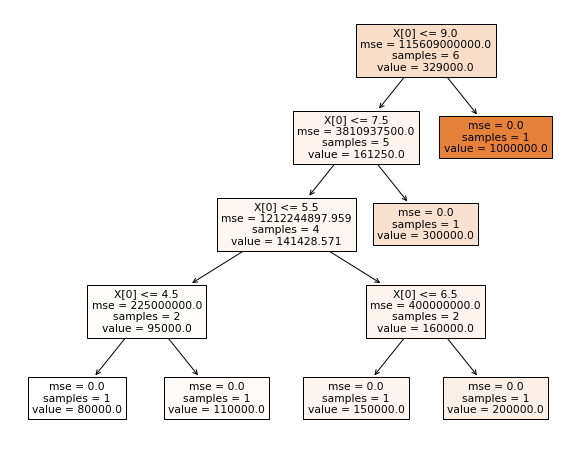

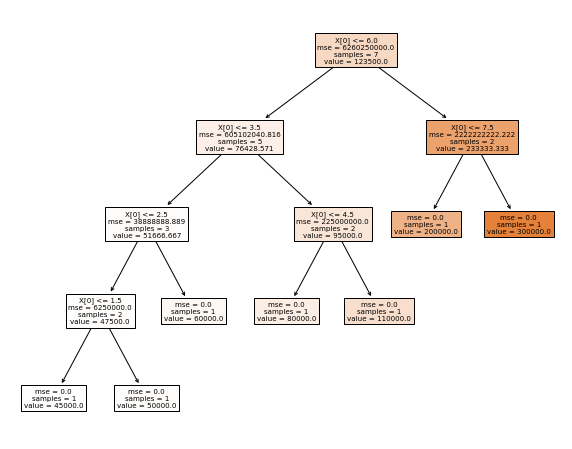

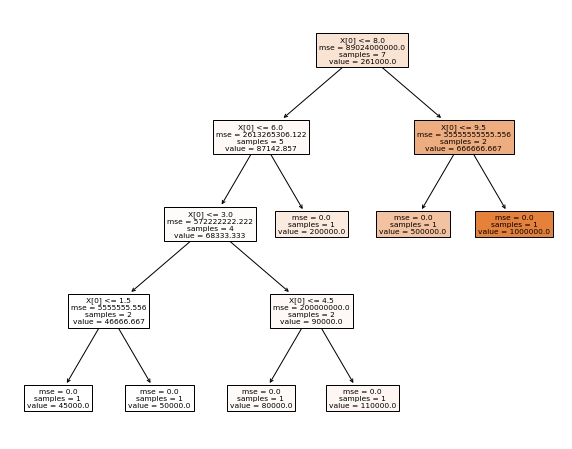

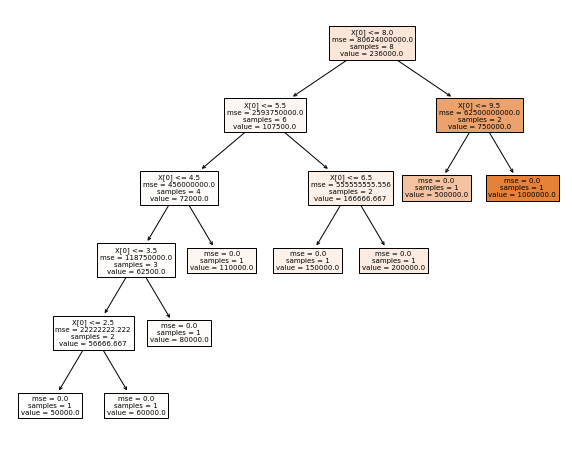

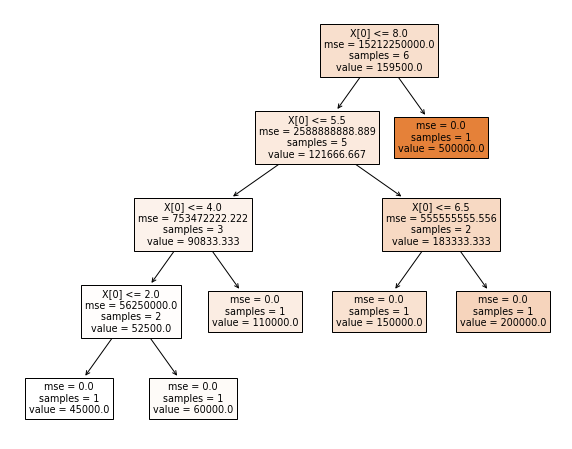

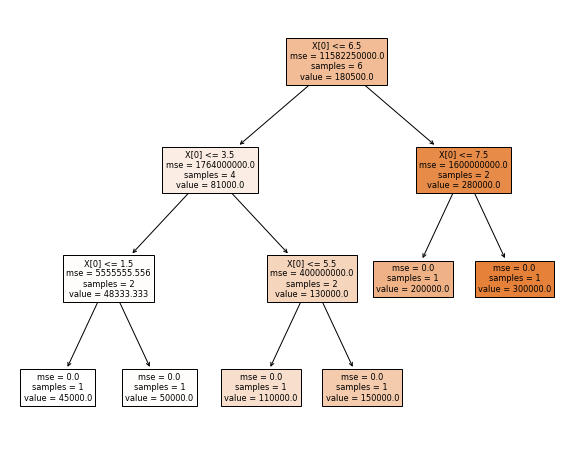

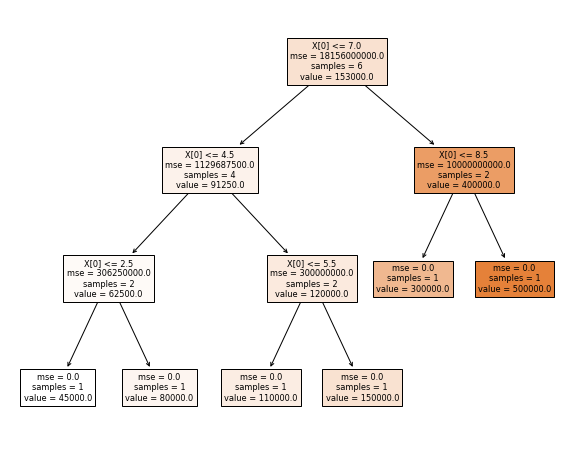

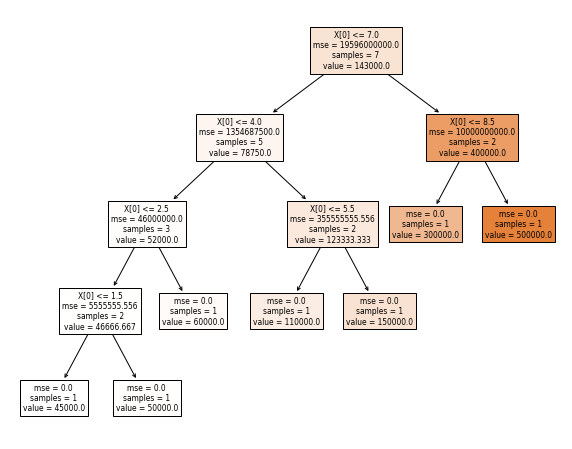

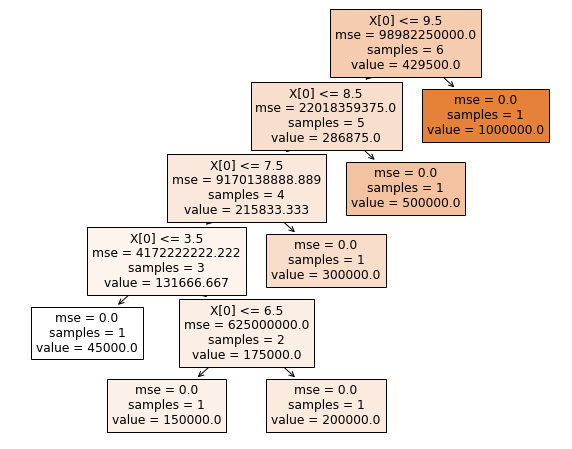

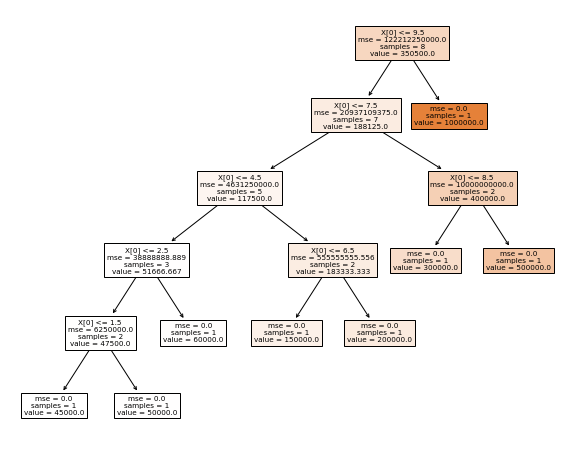

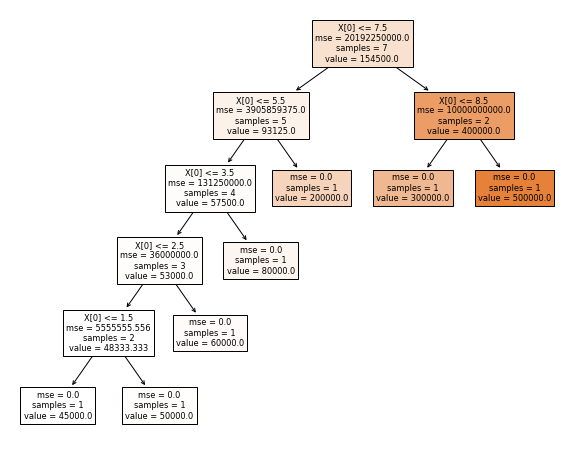

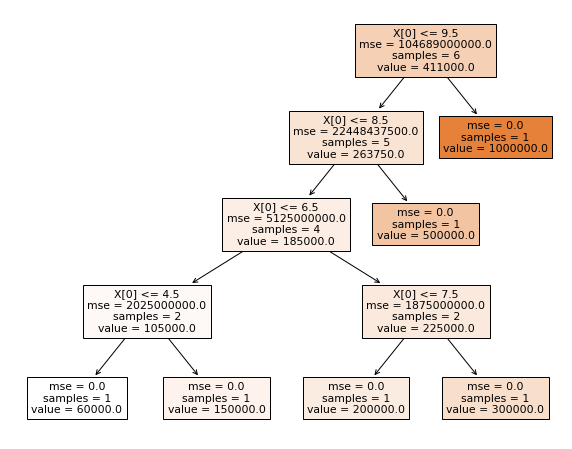

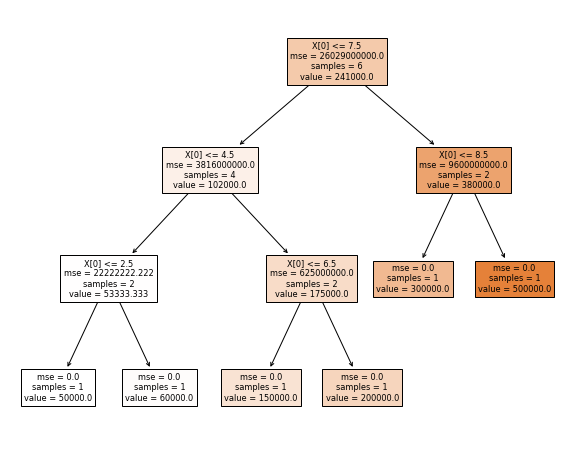

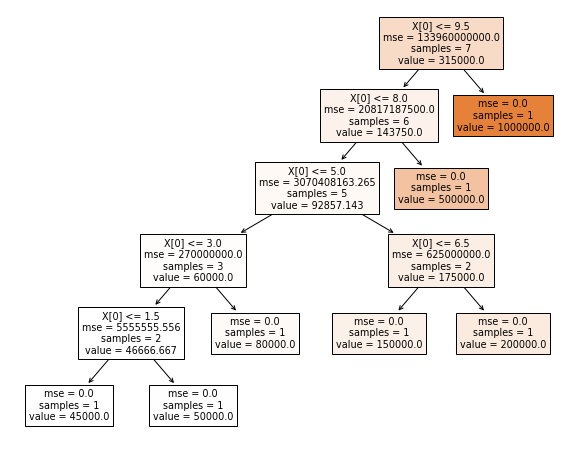

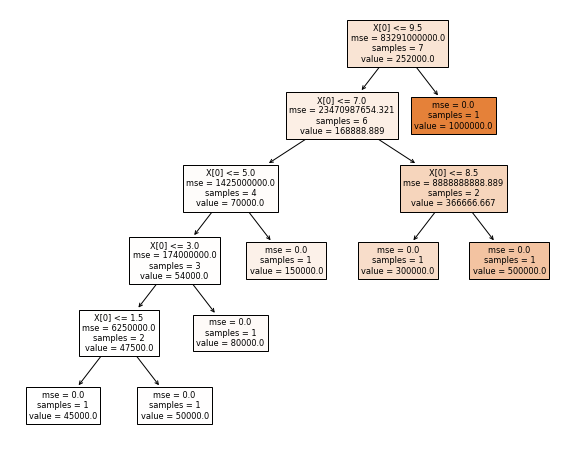

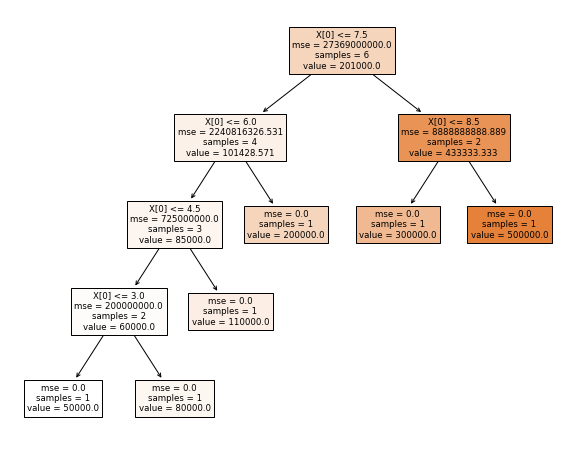

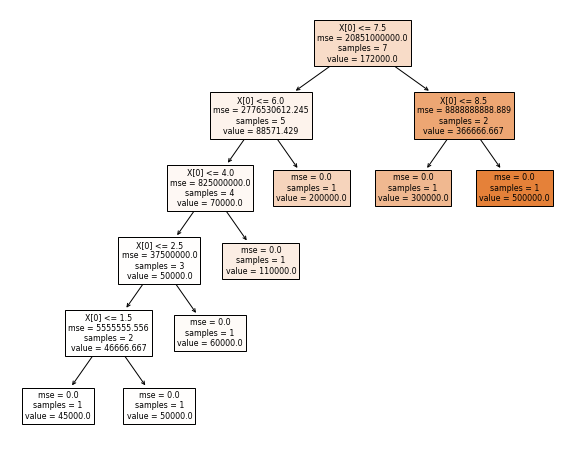

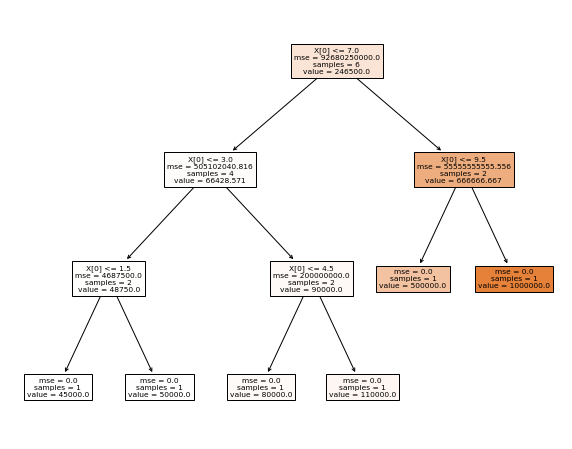

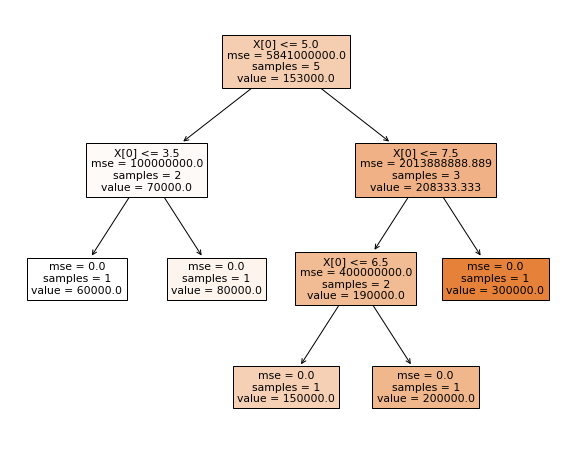

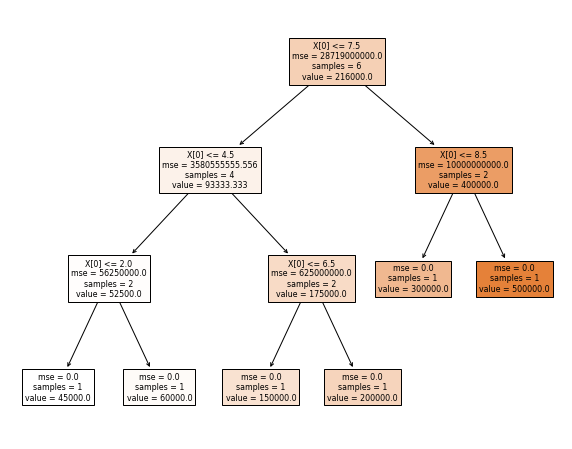

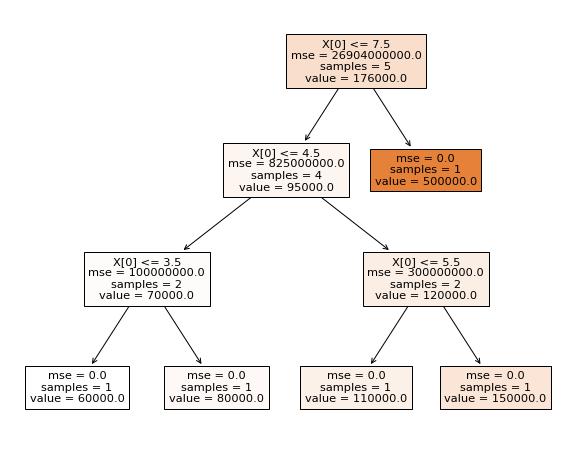

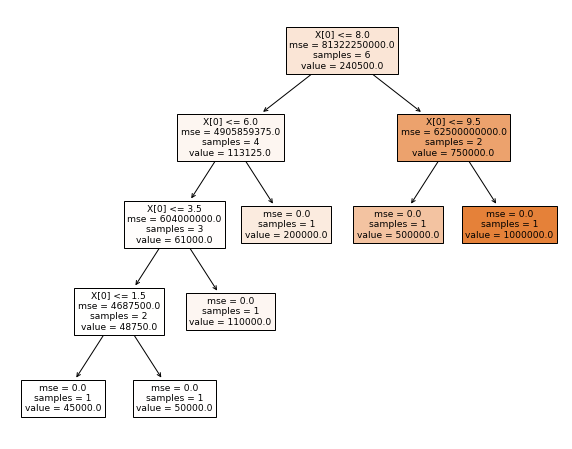

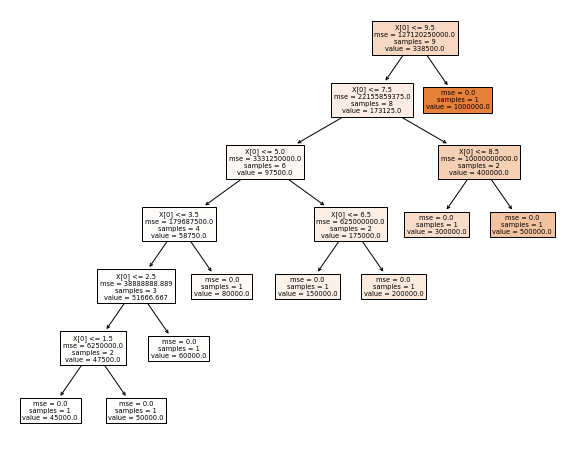

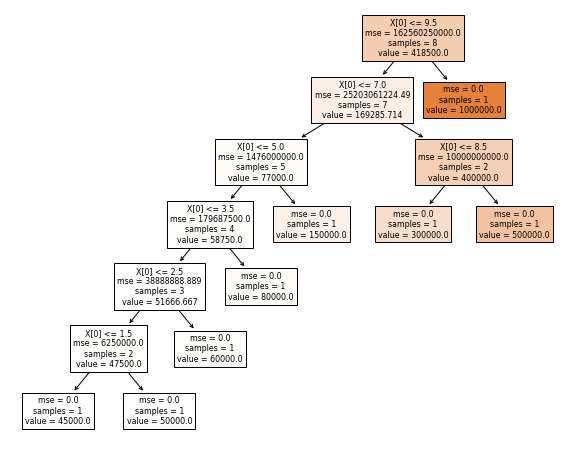

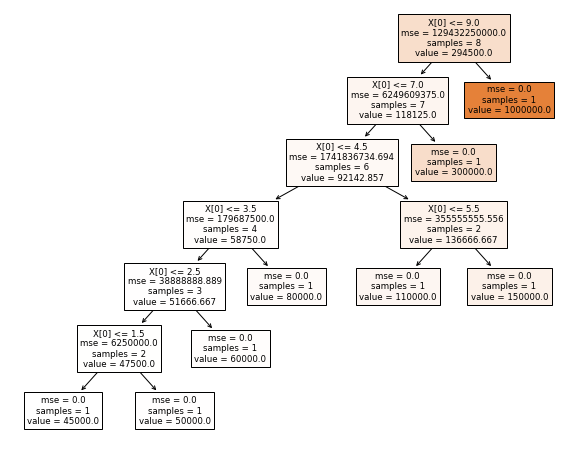

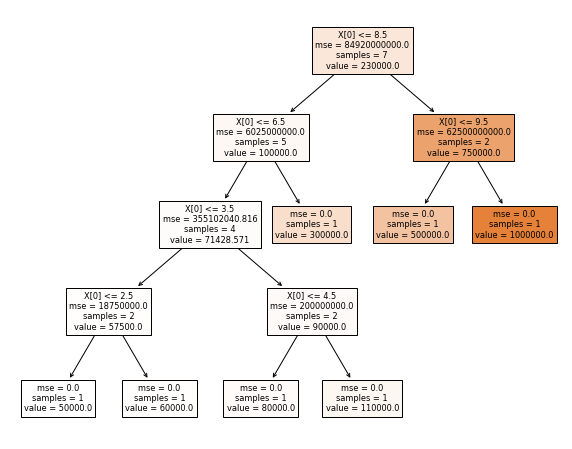

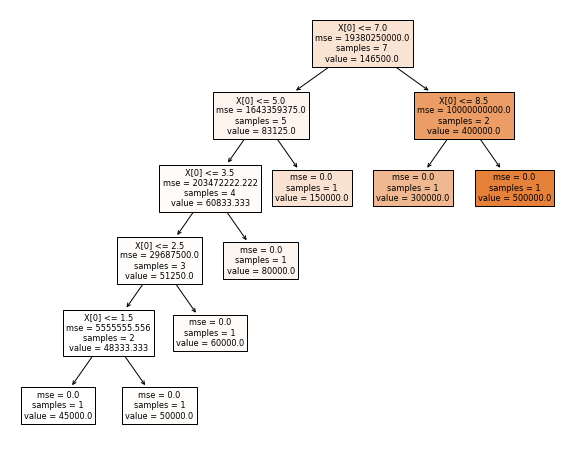

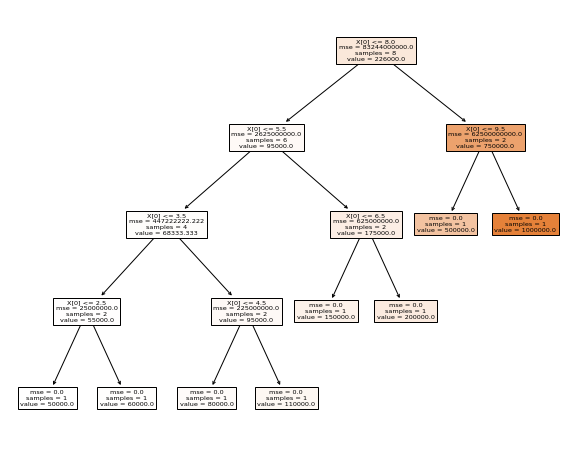

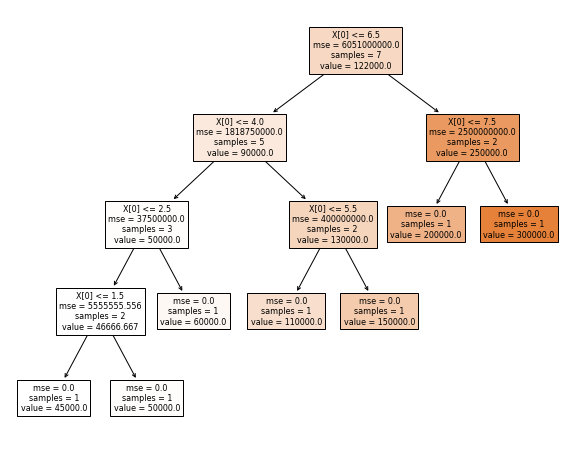

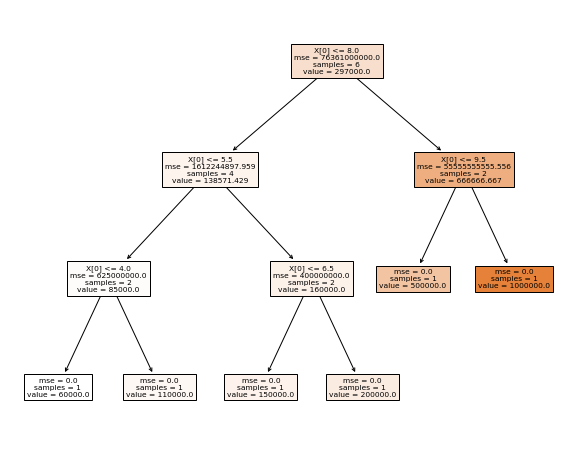

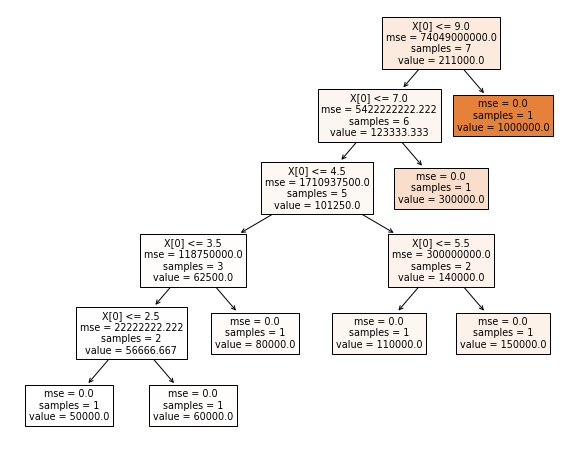

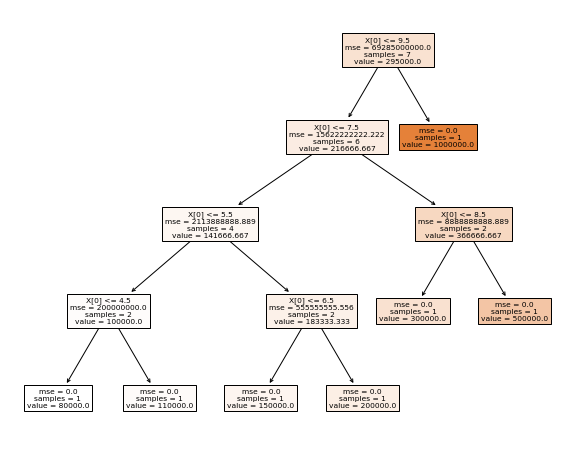

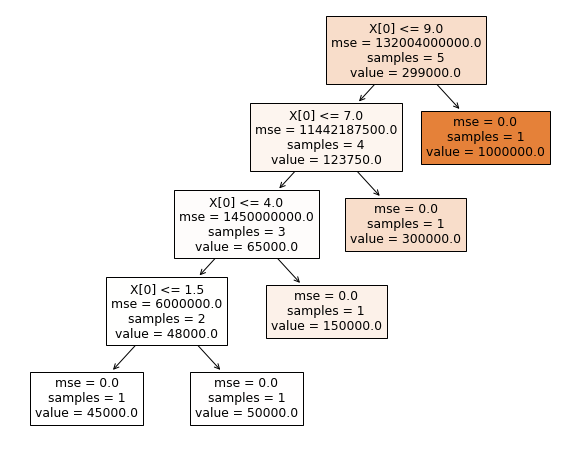

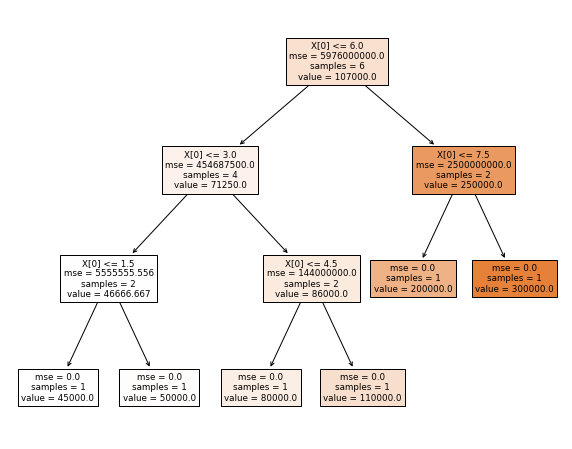

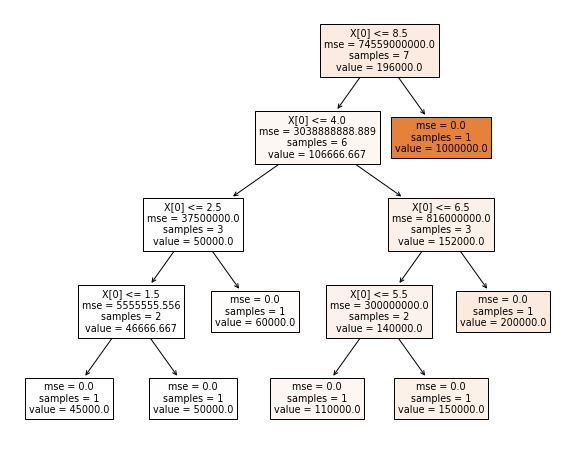

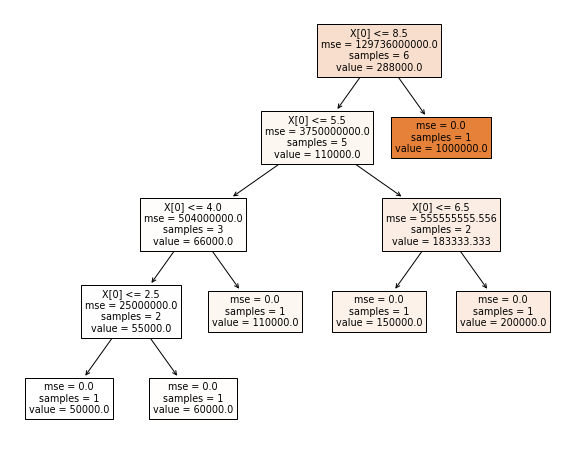

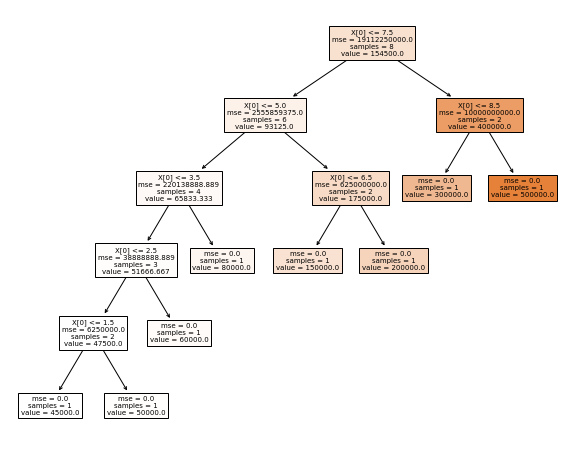

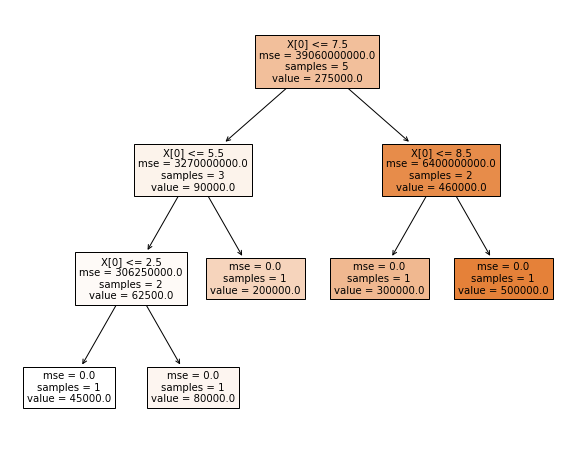

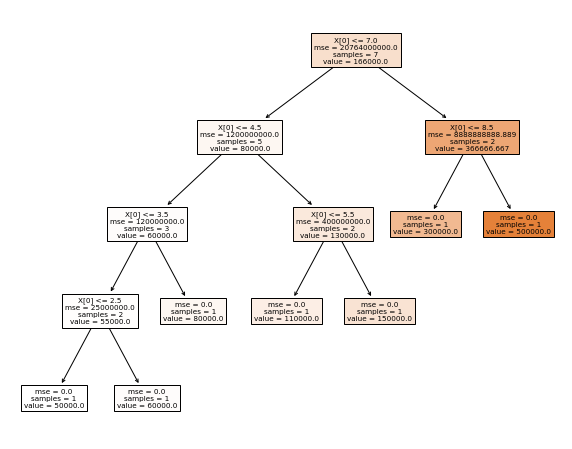

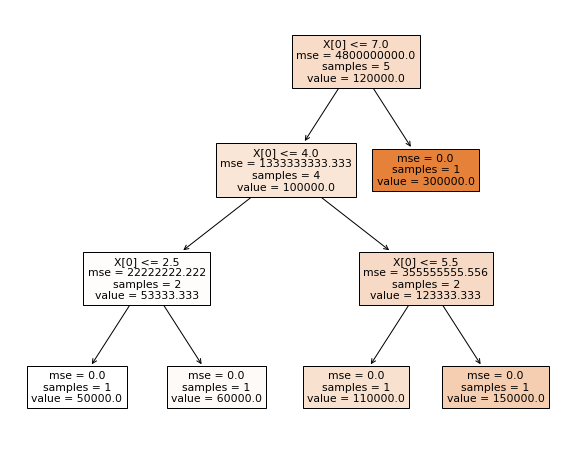

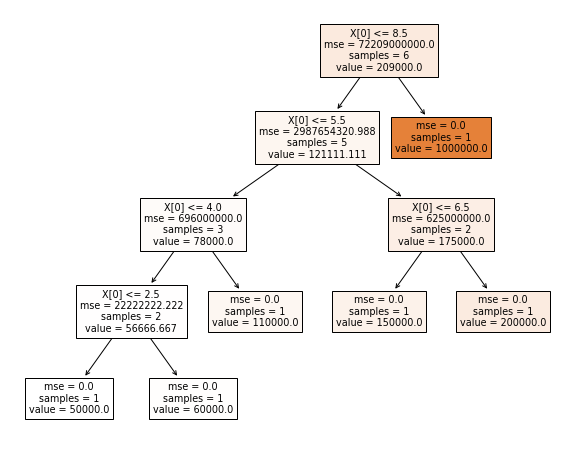

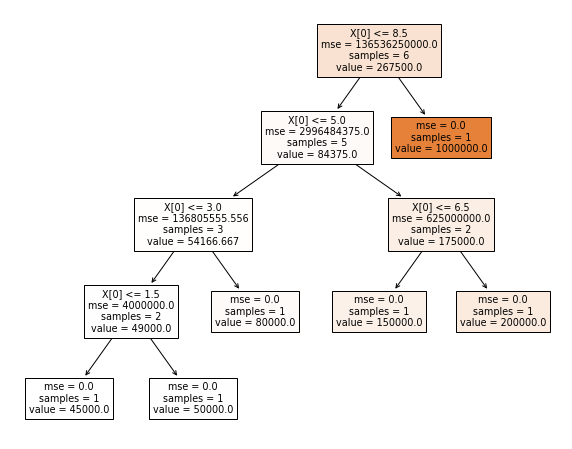

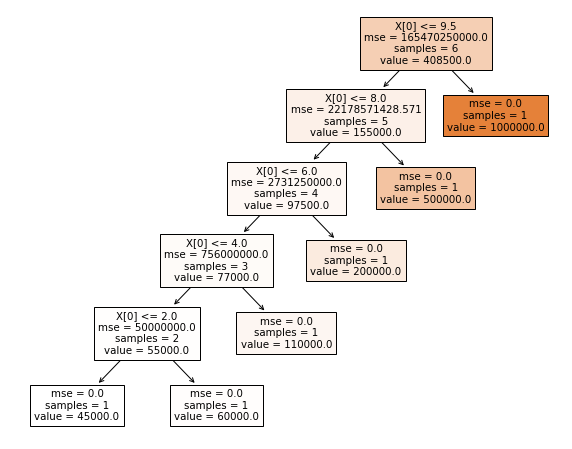

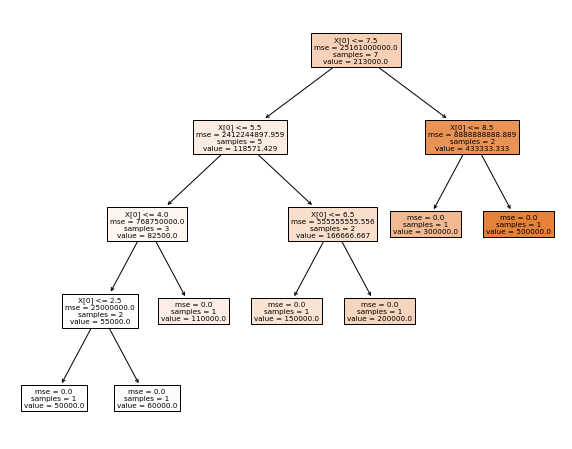

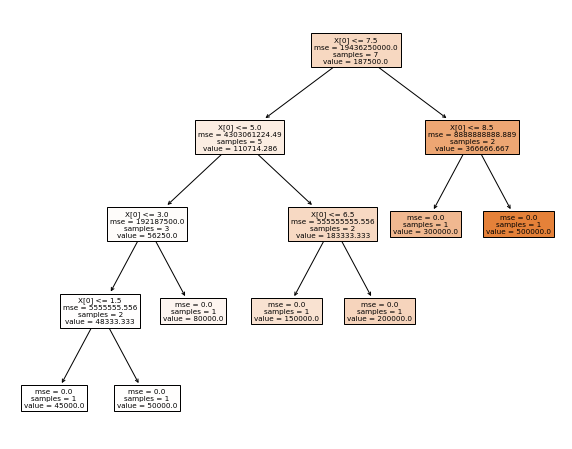

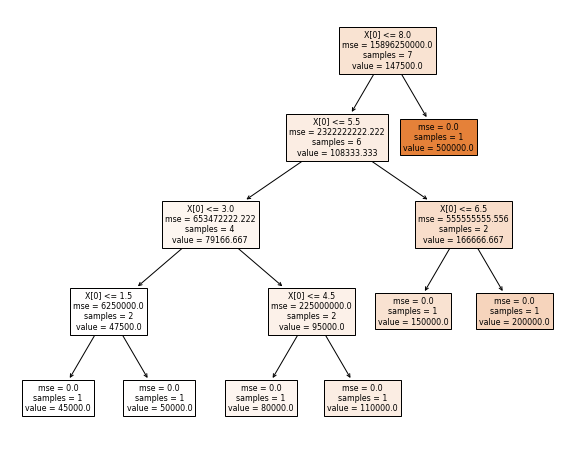

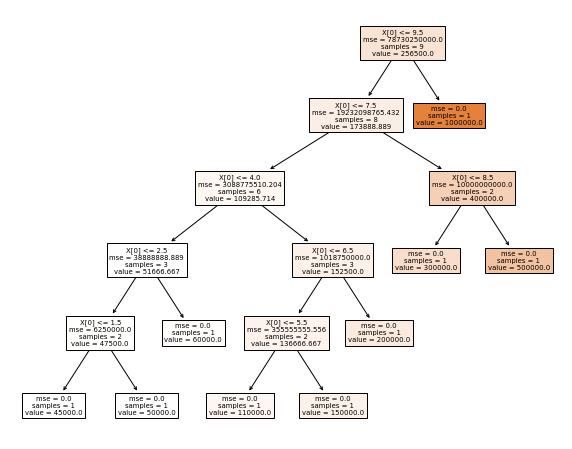

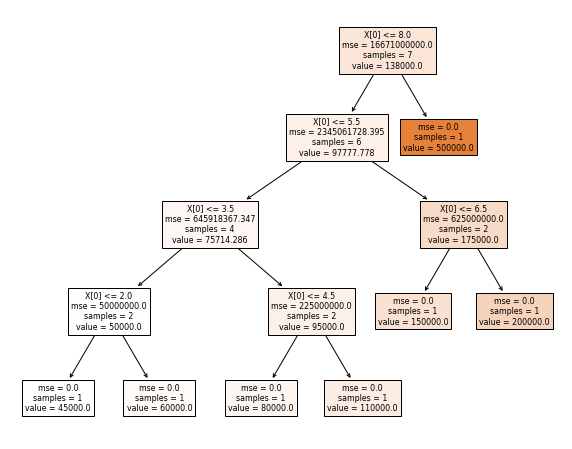

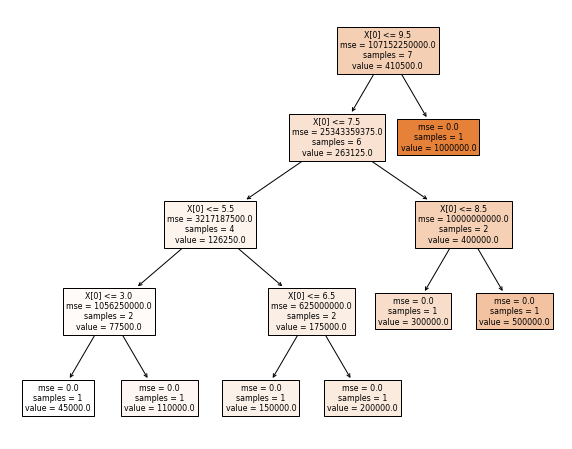

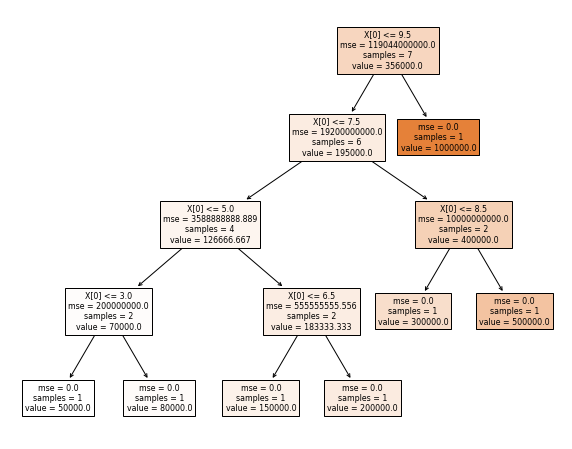

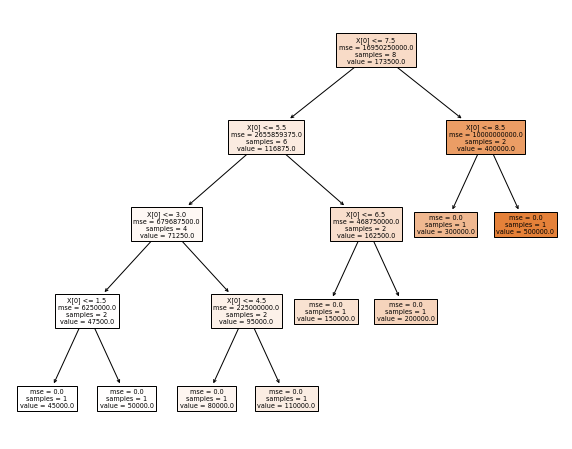

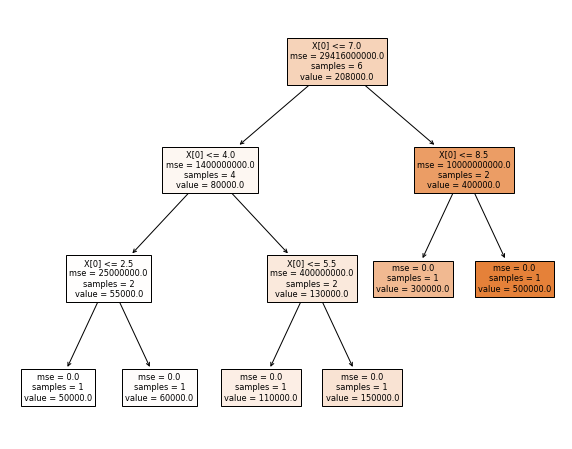

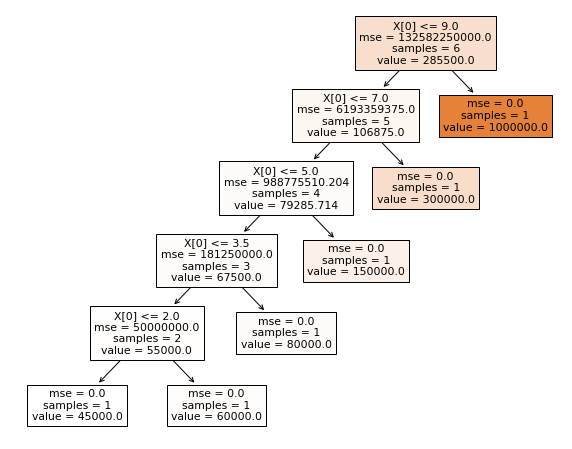

In [15]:
for i in range(0,100):
  plt.figure(figsize=(10,8))
  tree.plot_tree(modelRF.estimators_[i],filled=True)

MODEL PREDICTION

In [17]:
y_pred=modelRF.predict([[5.5]])
y_pred

array([121800.])

FINDING MEAN SQUARE ERROR AND R SQUARE ERROR

In [20]:
mse=mean_squared_error(y_test,modelRF.predict(x_test))
print('the mean square error is :\t',math.sqrt(mse))
print ('the R error is : \t',modelRF.score(x,y))

the mean square error is :	 319833.74196604086
the R error is : 	 0.9378393331453065


VISUALIZATION

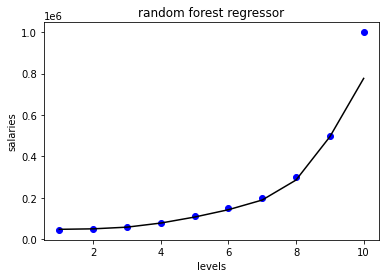

In [21]:
plt.scatter(x,y,color='b')
plt.plot(x,modelRF.predict(x),color='k')
plt.title('random forest regressor')
plt.xlabel('levels')
plt.ylabel('salaries')
plt.show()